In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../dataset_generation/")

import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use("project_style.mplstyle")
from tqdm import tqdm

import analysis_tools
import stats

In [2]:
# load model
if trajectories := True:
    model_type = "RNN"
else:
    model_type = "FF"

name = "al1_10_l2_0"
path = f"../models/{name}"
model, params = analysis_tools.load_model(path, device = "cpu", model_type = model_type) # model of interest

timesteps = 50000 # timesteps per sequence

In [3]:
sequence = ["square"]*1 # eval on test dataset

In [4]:
x, r0, v, c = analysis_tools.test_dataset(sequence, timesteps = timesteps, 
                                         context = params["context"], 
                                         trajectories = True) # create dataset

In [5]:
dataset = [((x[0][i,None], x[1][i,None]), x[1][i,None]) for i in range(len(sequence))] # repackage
g, p, cen, yhat0 = model.inference(dataset)

In [6]:
states = [x[0]]
yhat, g, p, mu = model(x)
if not trajectories:
    for i in range(len(model.g)-1):
        if i % 2 == 0:
            states.append(model.g[i](states[-1]))
states.append(g)
states.append(p)
states = [state.detach().numpy() for state in states]

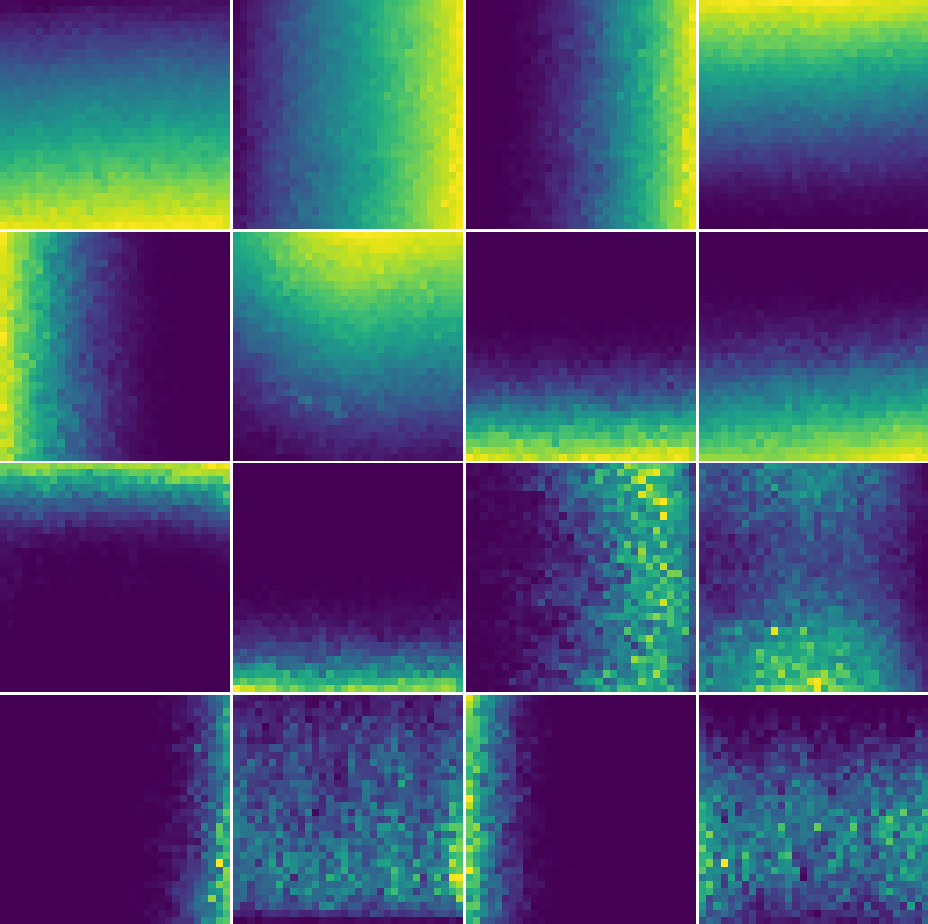

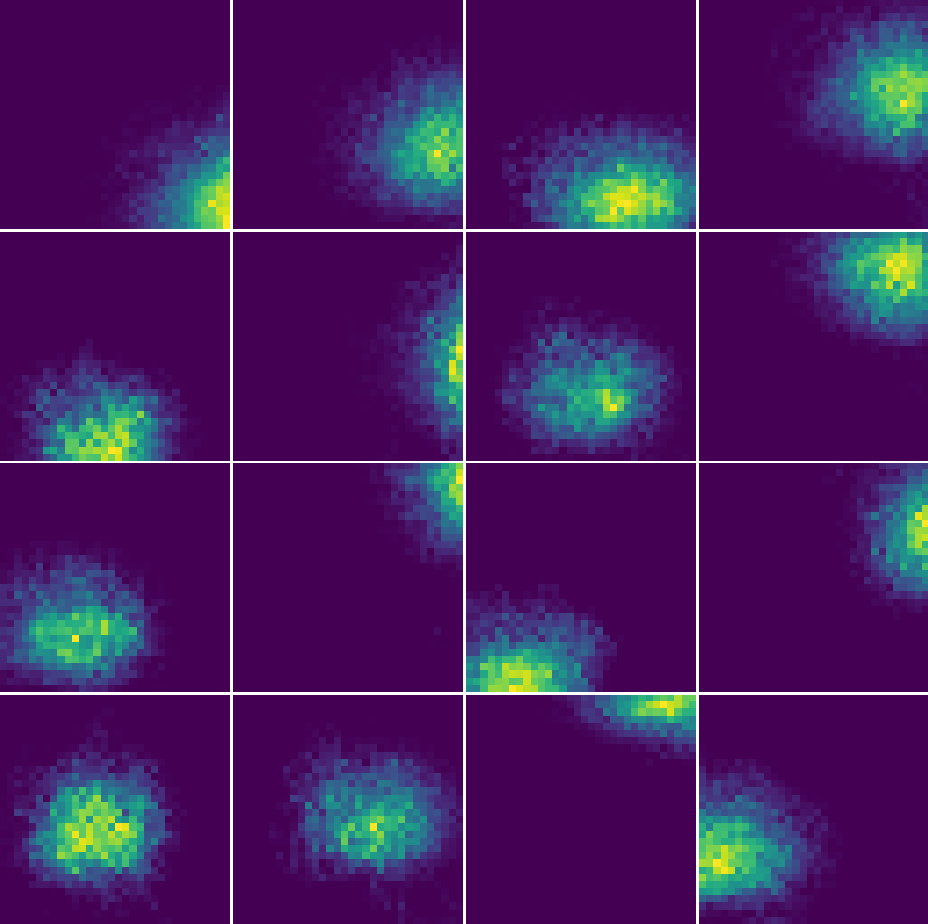

In [14]:
r = np.reshape(r0, (-1, r0.shape[-1]))

bins = [32, 32]

for i in range(1, len(states)):
    mask = np.random.randint(states[i].shape[-1], size = states[i].shape[-1]) 
    mask = np.argsort(np.nanmean(states[i], axis = (0, 1)))[::-1]
    state = states[i][:,:,mask] 
    ratemaps = stats.population_vector_ratemaps(state.reshape((-1, state.shape[-1]))[None], r[None], bins, smooth = False)
    analysis_tools.plot_ensemble(ratemaps[0], 4, cmap = None);
    plt.subplots_adjust(wspace = 0.01, hspace = 0.01)
    # plt.savefig(f"./figures/{name}_{model_type}_state_{i}")